In [1]:
pip install meteostat

Note: you may need to restart the kernel to use updated packages.


In [1]:
import meteostat

https://dev.meteostat.net/python/#installation

In [2]:
#Attempting to get to weather stations as a list: 
import requests

url = 'https://meteostat.p.rapidapi.com/stations/daily'

headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2d597b87a9mshc4501f1dfa26546p18b291jsn2d605ade9889'  # Replace {your_api_key} with your actual API key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-01'
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    # Process the data as needed
    print(data)
else:
    print('Error:', response.status_code)


Error: 403


In [3]:
import os
from dotenv import load_dotenv
import requests

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/stations/daily'
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': api_key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-01'
}

# Send request to the API
response = requests.get(url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Process the data as needed
    print(data)
else:
    print('Error:', response.status_code)


Error: 403


In [4]:
#Attempting to get to weather stations as DF 
import requests
import pandas as pd

url = 'https://meteostat.p.rapidapi.com/stations/daily'
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace {your_api_key} with your actual API key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-11'
}

# Make the API request
response = requests.get(url, headers=headers, params=params)

# Extract JSON data from the response
json_data = response.json()

# Normalize the JSON data into a DataFrame
weather_df = pd.json_normalize(json_data['data'], 
                               record_path=None, 
                               meta=['meta'])

# Print or use the DataFrame as needed
weather_df


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,0.4,-3.6,4.5,0.1,0.0,47.0,10.1,22.3,1035.5,438
1,2020-01-02,-0.5,-2.4,1.4,0.0,0.0,198.0,6.1,25.9,1031.2,0
2,2020-01-03,5.8,1.3,9.3,0.5,0.0,209.0,15.5,46.8,1024.4,0
3,2020-01-04,5.4,2.4,6.8,0.2,0.0,242.0,15.8,47.5,1031.5,0
4,2020-01-05,4.8,2.7,6.3,1.1,0.0,189.0,6.8,23.4,1036.6,0
5,2020-01-06,1.1,-0.9,4.6,0.0,0.0,198.0,6.5,19.8,1030.6,0
6,2020-01-07,3.4,-0.1,8.0,0.0,0.0,198.0,9.7,22.3,1029.9,168
7,2020-01-08,4.9,2.8,7.5,10.6,0.0,197.0,11.9,27.7,1028.9,0
8,2020-01-09,9.2,7.4,11.2,8.6,0.0,191.0,11.5,29.5,1019.9,0
9,2020-01-10,8.3,4.0,11.6,2.1,0.0,222.0,15.8,44.3,1021.6,168


Follow this for API key: 
https://rapidapi.com/developer/authorization/default-application_9067818

In [7]:
# Import Meteostat library
from meteostat import Stations

# Example usage
latitude = 38.9445
longitude = -77.4558

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(latitude, longitude)
station = stations.fetch(1)

# Print DataFrame
print(station)

                               name country region    wmo  icao  latitude  \
id                                                                          
72403  Dulles International Airport      US     VA  72403  KIAD   38.9333   

       longitude  elevation          timezone hourly_start hourly_end  \
id                                                                      
72403     -77.45       95.0  America/New_York   1973-01-01 2024-05-07   

      daily_start  daily_end monthly_start monthly_end     distance  
id                                                                   
72403  1960-04-01 2024-12-30    1961-01-01  2022-01-01  1342.616722  


In [8]:
IAD = Point(38.9445, -77.4558, 95)
BWI = Point(39.1774, -76.6684, 146)
PHL = Point(39.8721, -75.2431, 36)
EWR = Point(40.6895, -74.1745, 18)
JFK = Point(40.6413, -73.7781, 13)
LGA = Point(40.7769, -73.874, 21)

NameError: name 'Point' is not defined

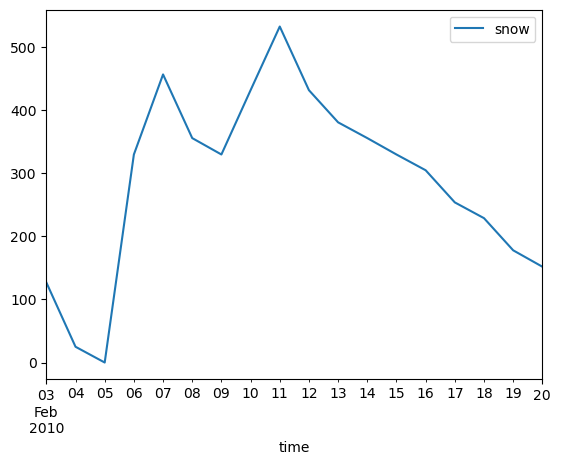

In [8]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2010, 2, 3)
end = datetime(2010, 2, 20)

# Create Point for Vancouver, BC
DCA = Point(38.8521, -77.0377, 0)

# Get daily data for 2018
data = Daily(DCA, start, end)
data = data.fetch()
data
# Plot line chart for snowgit
data.plot(y=['snow'])
plt.show()

In [ ]:
#Attempting to get to weather stations as DF 
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403', '72406', '72408', 'KLDJ0', '74486', 'KNYC0' ] #Insert IDs here

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-15'
    }

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/stations/daily' #First try
#url = 'https://meteostat.p.rapidapi.com/point/hourly'#Second try

#Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': api_key
}

# Make the API request
response = requests.get(url, headers=headers, params=params)

# Extract JSON data from the response
json_data = response.json()

# Normalize the JSON data into a DataFrame
weather_df = pd.json_normalize(json_data['data'], 
                               record_path=None, 
                               meta=['meta'])

# Print or use the DataFrame as needed
weather_df

In [9]:
#Attempting to get to hourly data 
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace {your_api_key} with your actual API key
}

# Retrieve API key from environment variable
#api_key = os.getenv('x-rapid_api_key')

In [10]:
import requests

# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-06',
    'end': '2010-02-06',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    weather_hourly = response.json()
    
    # Print the JSON data
    print(weather_hourly)
else:
    print("Failed to retrieve data. Status code:", response.status_code)


{'meta': {'generated': '2024-05-08 09:23:25', 'stations': ['72403', 'KJYO0', 'KHEF0', 'KHWY0']}, 'data': [{'time': '2010-02-06 00:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.5, 'snow': None, 'wdir': 60.0, 'wspd': 18.4, 'wpgt': None, 'pres': 1014.4, 'tsun': None, 'coco': None}, {'time': '2010-02-06 01:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.8, 'snow': None, 'wdir': 70.0, 'wspd': 20.5, 'wpgt': None, 'pres': 1012.0, 'tsun': None, 'coco': None}, {'time': '2010-02-06 02:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.3, 'snow': None, 'wdir': 60.0, 'wspd': 20.5, 'wpgt': None, 'pres': 1010.9, 'tsun': None, 'coco': None}, {'time': '2010-02-06 03:00:00', 'temp': 0.0, 'dwpt': -1.8, 'rhum': 88.0, 'prcp': 2.5, 'snow': None, 'wdir': 60.0, 'wspd': 25.9, 'wpgt': None, 'pres': 1008.8, 'tsun': None, 'coco': None}, {'time': '2010-02-06 04:00:00', 'temp': 0.0, 'dwpt': -1.8, 'rhum': 88.0, 'prcp': 2.0, 'snow': None, 'wdir': 60.0, 'wspd': 27.7, 'wpgt': None, 'pre

## HERE THE ANALYSIS STARTS

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

## IAD: Washington Dulles International Airport

In [78]:
# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-05',
    'end': '2010-02-17',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Extract JSON data from the response
weather_hourly = response.json()

# Normalize the JSON data into a DataFrame
df = pd.json_normalize(weather_hourly['data'])

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Round time to nearest 6-hour interval
df['time'] = df['time'].dt.round('12H')

# Group data by 12-hour intervals and aggregate
df_agg = df.groupby(pd.Grouper(key='time', freq='12H')).agg({
    'temp': 'mean',  # mean temperature
    'wspd': 'mean'   # mean wind speed
}).reset_index()

# Print the aggregated DataFrame
weather_iad_hourly = pd.DataFrame(df_agg)
weather_iad_hourly


,time,temp,wspd
0,2010-02-05 00:00:00,-0.557143,0.771429
1,2010-02-05 12:00:00,0.145455,3.181818
2,2010-02-06 00:00:00,0.138462,17.507692
3,2010-02-06 12:00:00,-1.572727,21.700000
4,2010-02-07 00:00:00,-5.707692,11.184615
5,2010-02-07 12:00:00,-7.818182,14.436364
6,2010-02-08 00:00:00,-3.853846,11.861538
7,2010-02-08 12:00:00,-6.518182,13.490909
8,2010-02-09 00:00:00,-4.061538,9.446154
9,2010-02-09 12:00:00,-7.781818,1.181818


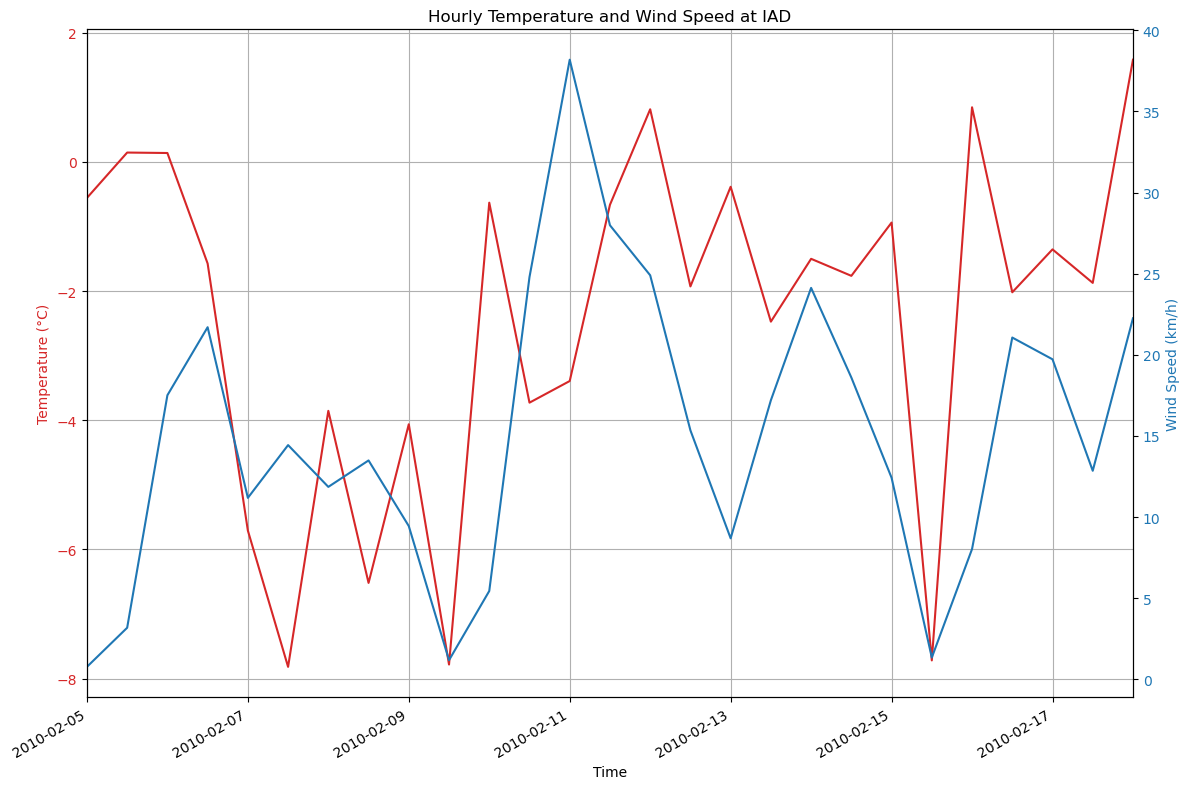

In [79]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot temperature (temp) on primary y-axis
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(weather_iad_hourly['time'], weather_iad_hourly['temp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for wind speed (wsp)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Wind Speed (km/h)', color=color)
ax2.plot(weather_iad_hourly['time'], weather_iad_hourly['wspd'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis limits
ax1.set_xlim(weather_iad_hourly['time'].min(), weather_iad_hourly['time'].max())

# Rotate and format x-axis labels
plt.xticks(rotation=45, ha='right')
fig.autofmt_xdate()

# Add grid
ax1.grid(True)

# Title and show the plot
plt.title('Hourly Temperature and Wind Speed at IAD')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## BWI: Baltimore/Washington International Thurgood Marshall Airport

In [80]:
# Define the parameters
parameters = {
    'lat': '39.177540',
    'lon': '-76.668526',
    'start': '2010-02-05',
    'end': '2010-02-17',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Extract JSON data from the response
weather_hourly = response.json()

# Normalize the JSON data into a DataFrame
df = pd.json_normalize(weather_hourly['data'])

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Round time to nearest 6-hour interval
df['time'] = df['time'].dt.round('12H')

# Group data by 12-hour intervals and aggregate
df_agg = df.groupby(pd.Grouper(key='time', freq='12H')).agg({
    'temp': 'mean',  # mean temperature
    'wspd': 'mean'   # mean wind speed
}).reset_index()

# Print the aggregated DataFrame
weather_bwi_hourly = pd.DataFrame(df_agg)
weather_bwi_hourly


,time,temp,wspd
0,2010-02-05 00:00:00,-0.400000,0.000000
1,2010-02-05 12:00:00,-0.118182,1.836364
2,2010-02-06 00:00:00,-0.446154,21.638462
3,2010-02-06 12:00:00,-2.081818,28.800000
4,2010-02-07 00:00:00,-4.700000,11.692308
5,2010-02-07 12:00:00,-7.063636,11.363636
6,2010-02-08 00:00:00,-4.238462,12.446154
7,2010-02-08 12:00:00,-6.654545,19.163636
8,2010-02-09 00:00:00,-3.000000,13.315385
9,2010-02-09 12:00:00,-5.063636,4.109091


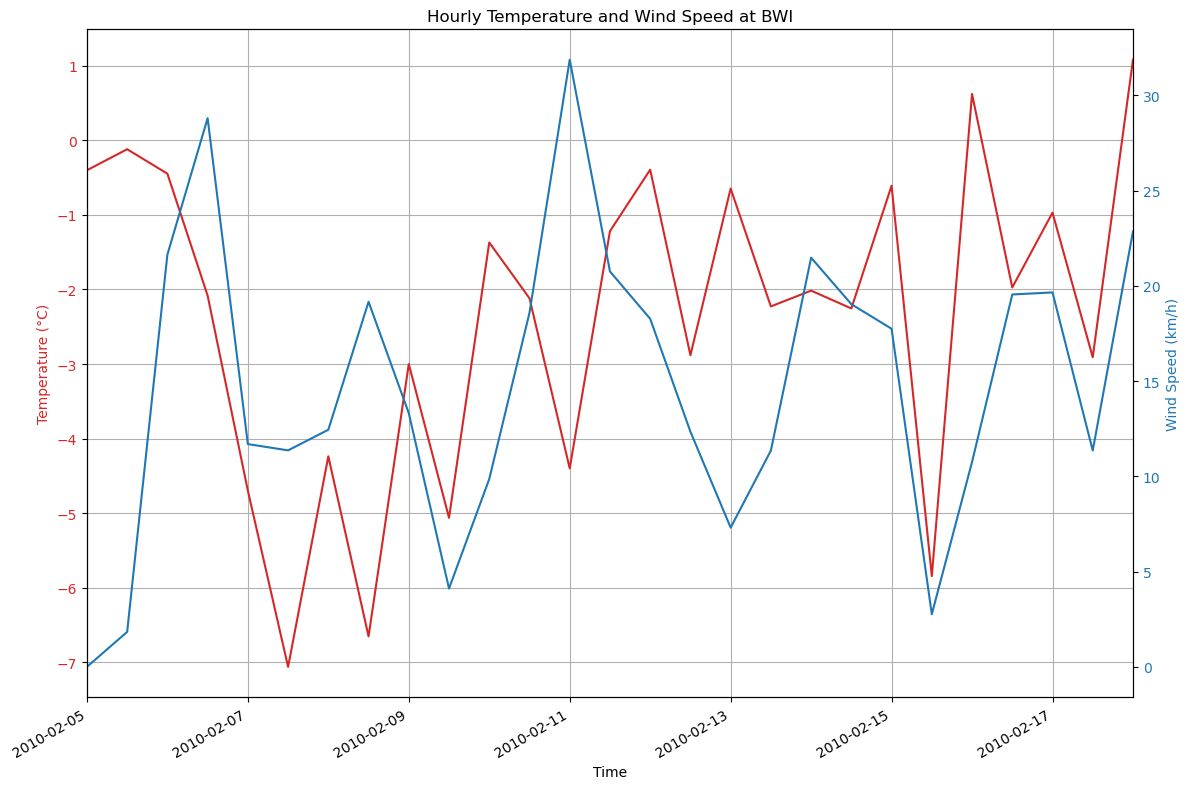

In [81]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot temperature (temp) on primary y-axis
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(weather_bwi_hourly['time'], weather_bwi_hourly['temp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for wind speed (wsp)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Wind Speed (km/h)', color=color)
ax2.plot(weather_bwi_hourly['time'], weather_bwi_hourly['wspd'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis limits
ax1.set_xlim(weather_bwi_hourly['time'].min(), weather_bwi_hourly['time'].max())

# Rotate and format x-axis labels
plt.xticks(rotation=45, ha='right')
fig.autofmt_xdate()

# Add grid
ax1.grid(True)

# Title and show the plot
plt.title('Hourly Temperature and Wind Speed at BWI')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## PHL: Philadelphia International Airport

In [82]:
# Define the parameters
parameters = {
    'lat': '39.872940',
    'lon': '-75.243988',
    'start': '2010-02-05',
    'end': '2010-02-17',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Extract JSON data from the response
weather_hourly = response.json()

# Normalize the JSON data into a DataFrame
df = pd.json_normalize(weather_hourly['data'])

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Round time to nearest 6-hour interval
df['time'] = df['time'].dt.round('12H')

# Group data by 6-hour intervals and aggregate
df_agg = df.groupby(pd.Grouper(key='time', freq='12H')).agg({
    'temp': 'mean',  # mean temperature
    'wspd': 'mean'   # mean wind speed
}).reset_index()

# Print the aggregated DataFrame
weather_phl_hourly = pd.DataFrame(df_agg)
weather_phl_hourly


,time,temp,wspd
0,2010-02-05 00:00:00,0.800000,10.942857
1,2010-02-05 12:00:00,0.045455,2.854545
2,2010-02-06 00:00:00,0.630769,12.561538
3,2010-02-06 12:00:00,-3.027273,37.963636
4,2010-02-07 00:00:00,-5.376923,19.946154
5,2010-02-07 12:00:00,-7.172727,17.336364
6,2010-02-08 00:00:00,-2.953846,14.823077
7,2010-02-08 12:00:00,-6.318182,16.654545
8,2010-02-09 00:00:00,-1.376923,20.500000
9,2010-02-09 12:00:00,-3.681818,7.818182


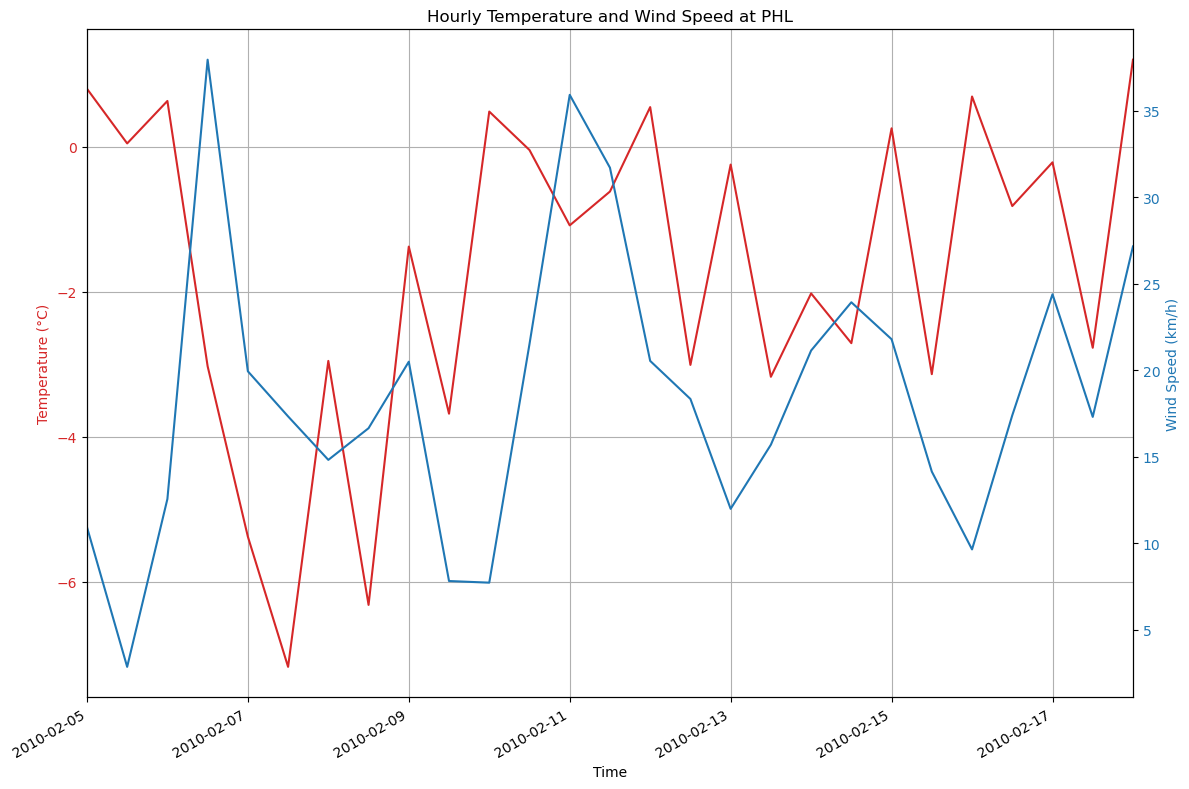

In [83]:

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot temperature (temp) on primary y-axis
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(weather_phl_hourly['time'], weather_phl_hourly['temp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for wind speed (wsp)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Wind Speed (km/h)', color=color)
ax2.plot(weather_phl_hourly['time'], weather_phl_hourly['wspd'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis limits
ax1.set_xlim(weather_phl_hourly['time'].min(), weather_phl_hourly['time'].max())

# Rotate and format x-axis labels
plt.xticks(rotation=45, ha='right')
fig.autofmt_xdate()

# Add grid
ax1.grid(True)

# Title and show the plot
plt.title('Hourly Temperature and Wind Speed at PHL')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## JFK: John F. Kennedy International Airport

In [84]:
# Define the parameters
parameters = {
    'lat': '40.641766',
    'lon': '-73.780968',
    'start': '2010-02-05',
    'end': '2010-02-17',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Extract JSON data from the response
weather_hourly = response.json()

# Normalize the JSON data into a DataFrame
df = pd.json_normalize(weather_hourly['data'])

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Round time to nearest 12-hour interval
df['time'] = df['time'].dt.round('12H')

# Group data by 12-hour intervals and aggregate
df_agg = df.groupby(pd.Grouper(key='time', freq='12H')).agg({
    'temp': 'mean',  # mean temperature
    'wspd': 'mean'   # mean wind speed
}).reset_index()

# Print the aggregated DataFrame
weather_jfk_hourly = pd.DataFrame(df_agg)
weather_jfk_hourly


,time,temp,wspd
0,2010-02-05 00:00:00,8.714286e-01,14.371429
1,2010-02-05 12:00:00,-5.454545e-02,12.690909
2,2010-02-06 00:00:00,1.415385e+00,11.307692
3,2010-02-06 12:00:00,-2.718182e+00,35.090909
4,2010-02-07 00:00:00,-4.523077e+00,32.507692
5,2010-02-07 12:00:00,-6.563636e+00,25.645455
6,2010-02-08 00:00:00,-1.969231e+00,29.823077
7,2010-02-08 12:00:00,-3.336364e+00,25.418182
8,2010-02-09 00:00:00,1.153846e+00,29.930769
9,2010-02-09 12:00:00,-4.545455e-01,15.672727


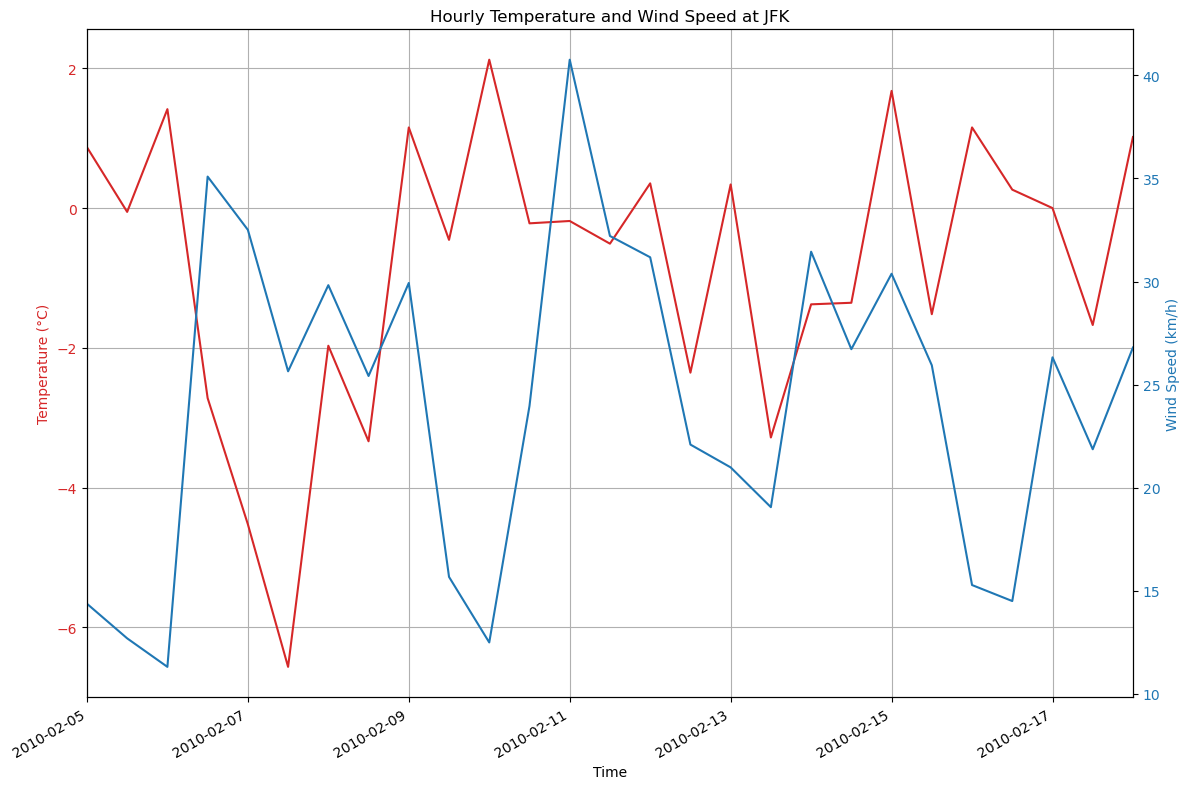

In [85]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot temperature (temp) on primary y-axis
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(weather_jfk_hourly['time'], weather_jfk_hourly['temp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for wind speed (wsp)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Wind Speed (km/h)', color=color)
ax2.plot(weather_jfk_hourly['time'], weather_jfk_hourly['wspd'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis limits
ax1.set_xlim(weather_jfk_hourly['time'].min(), weather_jfk_hourly['time'].max())

# Rotate and format x-axis labels
plt.xticks(rotation=45, ha='right')
fig.autofmt_xdate()

# Add grid
ax1.grid(True)

# Title and show the plot
plt.title('Hourly Temperature and Wind Speed at JFK')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [86]:
import pandas as pd

# Outer merge the DataFrames
merged_weather = pd.merge(weather_iad_hourly, weather_bwi_hourly, on='time', how='outer', suffixes=('_iad', '_bwi'))
merged_weather = pd.merge(merged_weather, weather_phl_hourly, on='time', how='outer')
merged_weather = pd.merge(merged_weather, weather_jfk_hourly, on='time', how='outer', suffixes=('_phl', '_jfk'))

# Display the merged DataFrame
merged_weather


,time,temp_iad,wspd_iad,temp_bwi,wspd_bwi,temp_phl,wspd_phl,temp_jfk,wspd_jfk
0,2010-02-05 00:00:00,-0.557143,0.771429,-0.400000,0.000000,0.800000,10.942857,8.714286e-01,14.371429
1,2010-02-05 12:00:00,0.145455,3.181818,-0.118182,1.836364,0.045455,2.854545,-5.454545e-02,12.690909
2,2010-02-06 00:00:00,0.138462,17.507692,-0.446154,21.638462,0.630769,12.561538,1.415385e+00,11.307692
3,2010-02-06 12:00:00,-1.572727,21.700000,-2.081818,28.800000,-3.027273,37.963636,-2.718182e+00,35.090909
4,2010-02-07 00:00:00,-5.707692,11.184615,-4.700000,11.692308,-5.376923,19.946154,-4.523077e+00,32.507692
5,2010-02-07 12:00:00,-7.818182,14.436364,-7.063636,11.363636,-7.172727,17.336364,-6.563636e+00,25.645455
6,2010-02-08 00:00:00,-3.853846,11.861538,-4.238462,12.446154,-2.953846,14.823077,-1.969231e+00,29.823077
7,2010-02-08 12:00:00,-6.518182,13.490909,-6.654545,19.163636,-6.318182,16.654545,-3.336364e+00,25.418182
8,2010-02-09 00:00:00,-4.061538,9.446154,-3.000000,13.315385,-1.376923,20.500000,1.153846e+00,29.930769
9,2010-02-09 12:00:00,-7.781818,1.181818,-5.063636,4.109091,-3.681818,7.818182,-4.545455e-01,15.672727


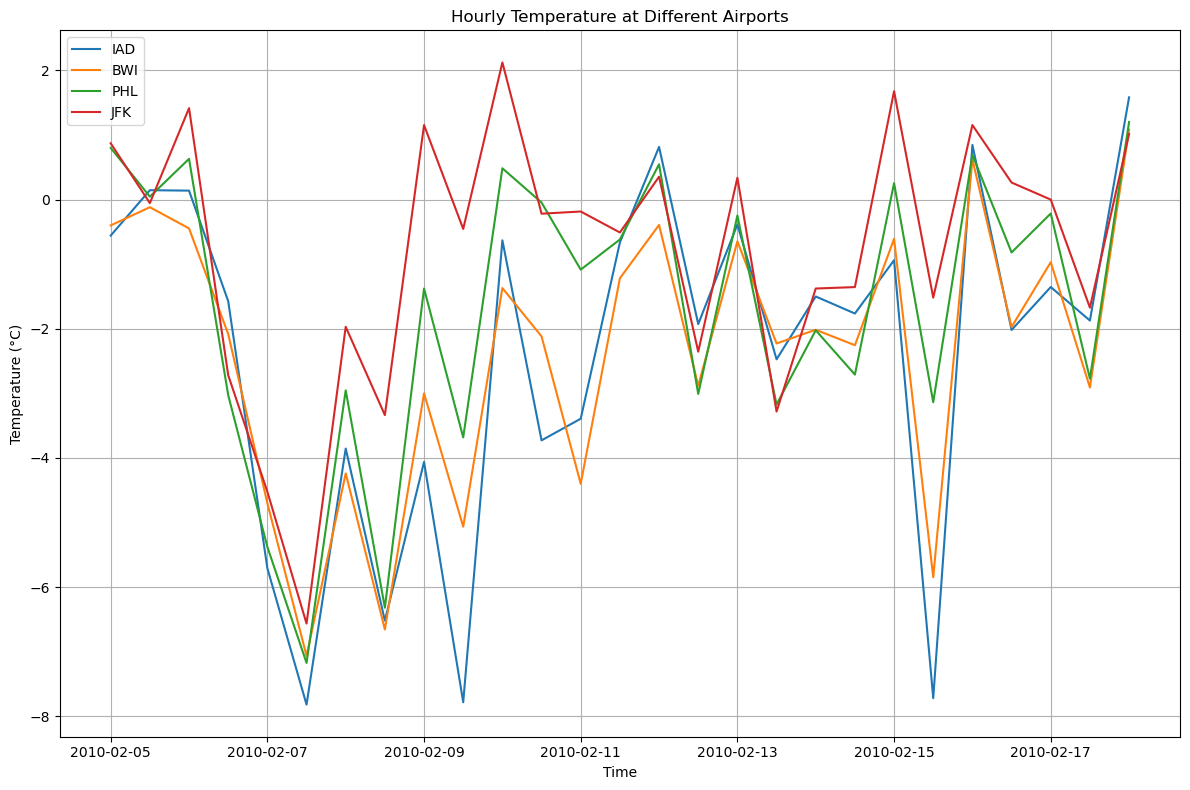

In [87]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot temperature for each airport
ax.plot(merged_weather['time'], merged_weather['temp_iad'], label='IAD', color='tab:blue', linestyle='-')
ax.plot(merged_weather['time'], merged_weather['temp_bwi'], label='BWI', color='tab:orange', linestyle='-')
ax.plot(merged_weather['time'], merged_weather['temp_phl'], label='PHL', color='tab:green', linestyle='-')
ax.plot(merged_weather['time'], merged_weather['temp_jfk'], label='JFK', color='tab:red', linestyle='-')

# Set x-axis label
ax.set_xlabel('Time')

# Set y-axis label
ax.set_ylabel('Temperature (°C)')

# Add title
ax.set_title('Hourly Temperature at Different Airports')

# Add legend
ax.legend()

# Add grid
ax.grid(True)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


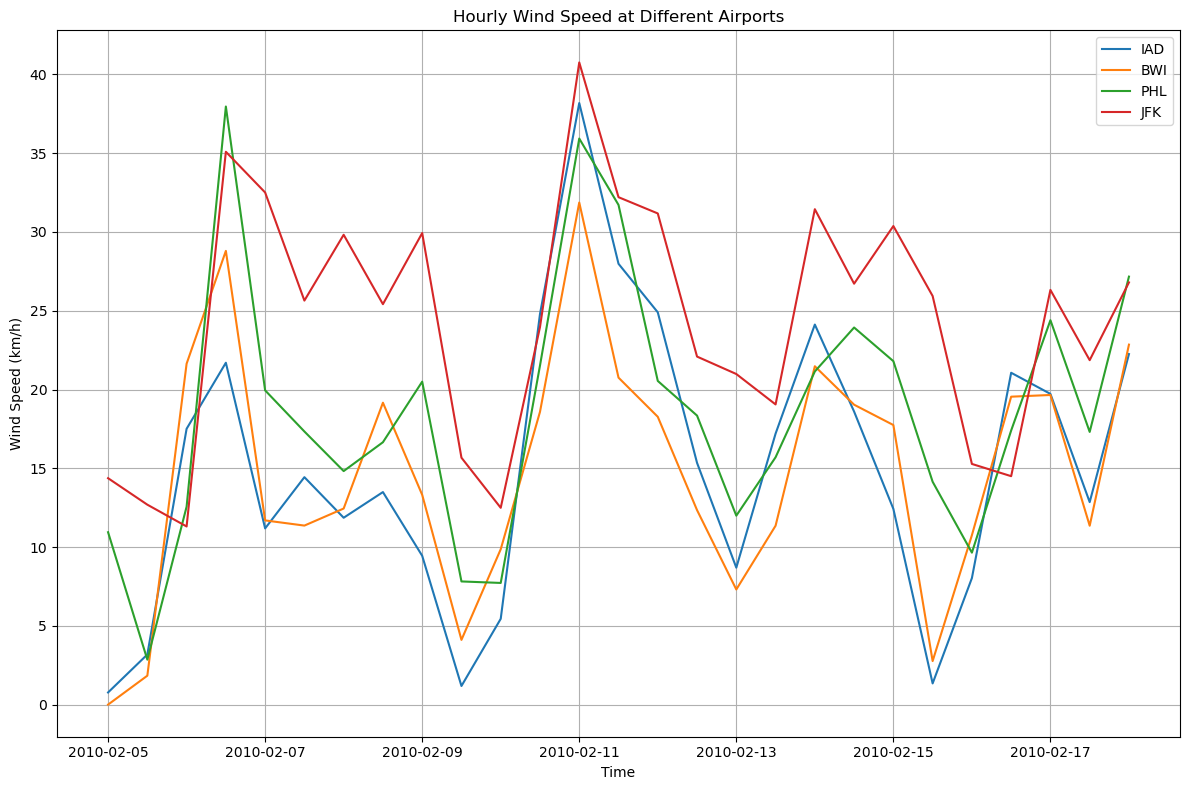

In [88]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot wind speed for each airport
ax.plot(merged_weather['time'], merged_weather['wspd_iad'], label='IAD', color='tab:blue', linestyle='-')
ax.plot(merged_weather['time'], merged_weather['wspd_bwi'], label='BWI', color='tab:orange', linestyle='-')
ax.plot(merged_weather['time'], merged_weather['wspd_phl'], label='PHL', color='tab:green', linestyle='-')
ax.plot(merged_weather['time'], merged_weather['wspd_jfk'], label='JFK', color='tab:red', linestyle='-')

# Set x-axis label
ax.set_xlabel('Time')

# Set y-axis label
ax.set_ylabel('Wind Speed (km/h)')

# Add title
ax.set_title('Hourly Wind Speed at Different Airports')

# Add legend
ax.legend()

# Add grid
ax.grid(True)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()
